In [ ]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

In [ ]:
#Install kaggle
!pip install -q kaggle

In [ ]:
#Kaggle file should be uploaded here
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahankavinda","key":"479f21373f658ea3ce6bbbd09219b9be"}'}

In [ ]:
#Create Kaggle folder
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                       Diabetes Dataset                                      9KB  2022-10-06 08:55:25          16670        485  1.0              
akshaydattatraykhare/data-for-admission-in-the-university   Data for Admission in the University                  4KB  2022-10-27 11:05:45           4347        104  1.0              
thedevastator/jobs-dataset-from-glassdoor                   Salary Prediction                                     3MB  2022-11-16 13:52:31            863         30  1.0              
piterfm/fifa-football-world-cup                             FIFA Football World 

In [ ]:
! kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 39.2MB/s]


In [ ]:
! unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
#Loading data
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
506,63958,Female,42.0,0,0,Yes,Private,Urban,96.99,34.8,formerly smoked,0
1971,48775,Female,78.0,1,0,Yes,Self-employed,Rural,201.07,21.8,Unknown,0
4863,68601,Female,18.0,0,0,No,Private,Urban,67.92,19.4,never smoked,0
2470,20740,Female,50.0,0,0,Yes,Self-employed,Rural,84.88,27.1,never smoked,0
2077,53399,Male,74.0,0,0,Yes,Private,Rural,65.28,28.2,never smoked,0


In [ ]:
data.shape


(5110, 12)

In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# identify duplicates
duplicates = data.loc[data.duplicated()]
duplicates

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# identify null values

data.loc[data['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
#Removing null values

data.dropna(how='any', axis=0, inplace=True)

In [ ]:
data.loc[data['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
data.shape

(4909, 12)

In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
data.select_dtypes(include='object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



In [ ]:
#Checking memory udsage

memory_usage = data.memory_usage()/1024 # convert to KB
total_memory_usage = memory_usage.sum()
print(F"total memory usage:{total_memory_usage} KB")
memory_usage

total memory usage:498.5703125 KB


Index                38.351562
id                   38.351562
gender               38.351562
age                  38.351562
hypertension         38.351562
heart_disease        38.351562
ever_married         38.351562
work_type            38.351562
Residence_type       38.351562
avg_glucose_level    38.351562
bmi                  38.351562
smoking_status       38.351562
stroke               38.351562
dtype: float64

In [ ]:
#Changing data type

data['age'] = data['age'].astype('int8')

In [ ]:
memory_usage = data.memory_usage()/1024 # convert to KB
total_memory_usage = memory_usage.sum()
print(F"total memory usage:{total_memory_usage} KB")
memory_usage

total memory usage:465.0126953125 KB


Index                38.351562
id                   38.351562
gender               38.351562
age                   4.793945
hypertension         38.351562
heart_disease        38.351562
ever_married         38.351562
work_type            38.351562
Residence_type       38.351562
avg_glucose_level    38.351562
bmi                  38.351562
smoking_status       38.351562
stroke               38.351562
dtype: float64

In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data[[ 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',]].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


In [ ]:
#Changing data type into Category

data['gender'] = data['gender'].astype('category')
data['ever_married'] = data['ever_married'].astype('category')
data['work_type'] = data['work_type'].astype('category')
data['Residence_type'] = data['Residence_type'].astype('category')
data['smoking_status'] = data['smoking_status'].astype('category')

In [ ]:
data.dtypes

id                      int64
gender               category
age                      int8
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [ ]:
class_names = data['gender'].unique()
class_names

['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

In [ ]:
# Assign numbers to objects

data['gender_numeric'] = data['gender']
data['gender_numeric'].replace('Female', 0, inplace=True)
data['gender_numeric'].replace('Male', 1, inplace=True)
data['gender_numeric'].replace('Other', 3, inplace=True)
data['ever_married_numeric'] = data['ever_married']
data['ever_married_numeric'].replace('No', 0, inplace=True)
data['ever_married_numeric'].replace('Yes', 1, inplace=True)
data['work_type_numeric'] = data['work_type']
data['work_type_numeric'].replace('Private', 1, inplace=True)
data['work_type_numeric'].replace('Self-employed', 2, inplace=True)
data['work_type_numeric'].replace('Govt_job', 3, inplace=True)
data['work_type_numeric'].replace('children', 4, inplace=True)
data['work_type_numeric'].replace('Never_worked', 5, inplace=True)
data['Residence_type_numeric'] = data['Residence_type']
data['Residence_type_numeric'].replace('Rural', 0, inplace=True)
data['Residence_type_numeric'].replace('Urban', 1, inplace=True)
data['smoking_status_numeric'] = data['smoking_status']
data['smoking_status_numeric'].replace('never smoked', 0, inplace=True)
data['smoking_status_numeric'].replace('formerly smoked', 1, inplace=True)
data['smoking_status_numeric'].replace('smokes', 2, inplace=True)
data['smoking_status_numeric'].replace('Unknown', 3, inplace=True)

In [ ]:
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_numeric,ever_married_numeric,work_type_numeric,Residence_type_numeric,smoking_status_numeric
2682,67911,Male,80,0,0,No,Self-employed,Rural,235.54,37.4,formerly smoked,0,1,0,2,0,1
2470,20740,Female,50,0,0,Yes,Self-employed,Rural,84.88,27.1,never smoked,0,0,1,2,0,0
4187,67356,Female,43,0,0,Yes,Private,Urban,80.80,46.1,never smoked,0,0,1,1,1,0
2915,34068,Female,23,0,0,Yes,Govt_job,Urban,77.53,33.9,formerly smoked,0,0,1,3,1,1
511,27832,Female,51,0,0,Yes,Private,Rural,82.93,29.7,smokes,0,0,1,1,0,2


In [ ]:
#Rearranging the column order

data = data[['id', 'gender','gender_numeric', 'age', 'hypertension', 'heart_disease',
       'ever_married','ever_married_numeric', 'work_type','work_type_numeric', 'Residence_type', 'Residence_type_numeric', 'avg_glucose_level',
       'bmi', 'smoking_status', 'smoking_status_numeric', 'stroke']]
data.head()

,id,gender,gender_numeric,age,hypertension,heart_disease,ever_married,ever_married_numeric,work_type,work_type_numeric,Residence_type,Residence_type_numeric,avg_glucose_level,bmi,smoking_status,smoking_status_numeric,stroke
0,9046,Male,1,67,0,1,Yes,1,Private,1,Urban,1,228.69,36.6,formerly smoked,1,1
2,31112,Male,1,80,0,1,Yes,1,Private,1,Rural,0,105.92,32.5,never smoked,0,1
3,60182,Female,0,49,0,0,Yes,1,Private,1,Urban,1,171.23,34.4,smokes,2,1
4,1665,Female,0,79,1,0,Yes,1,Self-employed,2,Rural,0,174.12,24.0,never smoked,0,1
5,56669,Male,1,81,0,0,Yes,1,Private,1,Urban,1,186.21,29.0,formerly smoked,1,1


In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,4909.0,NaN,NaN,NaN,37064.313506,20995.098457,77.0,18605.0,37608.0,55220.0,72940.0
gender,4909,3,Female,2897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_numeric,4909.0,3.0,0.0,2897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4909.0,NaN,NaN,NaN,42.854145,22.575986,0.0,25.0,44.0,60.0,82.0
hypertension,4909.0,NaN,NaN,NaN,0.091872,0.288875,0.0,0.0,0.0,0.0,1.0
heart_disease,4909.0,NaN,NaN,NaN,0.049501,0.216934,0.0,0.0,0.0,0.0,1.0
ever_married,4909,2,Yes,3204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married_numeric,4909.0,2.0,1.0,3204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,4909,5,Private,2811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type_numeric,4909.0,5.0,1.0,2811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['work_type'].value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

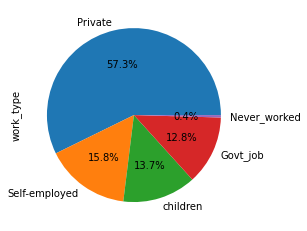

In [ ]:
#Data visualization

data['work_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

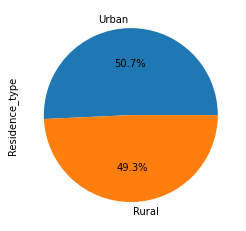

In [ ]:
data['Residence_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

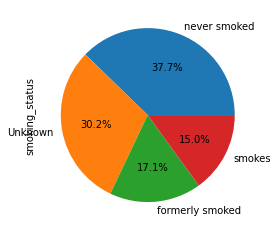

In [ ]:
data['smoking_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
data.columns

Index(['id', 'gender', 'gender_numeric', 'age', 'hypertension',
       'heart_disease', 'ever_married', 'ever_married_numeric', 'work_type',
       'work_type_numeric', 'Residence_type', 'Residence_type_numeric',
       'avg_glucose_level', 'bmi', 'smoking_status', 'smoking_status_numeric',
       'stroke'],
      dtype='object')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274329,0.256999,0.235725,0.333738,0.232221
hypertension,0.274329,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.256999,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235725,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333738,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232221,0.142515,0.137938,0.138936,0.042374,1.000000


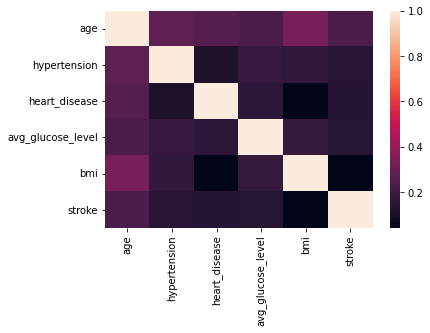

In [ ]:
#Corelation matrix

correlation_matrix = data[['gender_numeric', 'age', 'hypertension', 'heart_disease',
       'ever_married_numeric','work_type_numeric', 'Residence_type_numeric', 'avg_glucose_level',
       'bmi', 'smoking_status_numeric', 'stroke']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

In [ ]:
#Preparing for Machine Learning Model training

X_variables = ['gender_numeric', 'age', 'hypertension', 'heart_disease',
       'ever_married_numeric','work_type_numeric', 'Residence_type_numeric', 'avg_glucose_level',
       'bmi', 'smoking_status_numeric', ]
y_varibale = 'stroke'

X = data[X_variables]
y = data[y_varibale]

print(X.head())
print('\n')
print(X.describe())

  gender_numeric  age  hypertension  heart_disease ever_married_numeric  \
0              1   67             0              1                    1   
2              1   80             0              1                    1   
3              0   49             0              0                    1   
4              0   79             1              0                    1   
5              1   81             0              0                    1   

  work_type_numeric Residence_type_numeric  avg_glucose_level   bmi  \
0                 1                      1             228.69  36.6   
2                 1                      0             105.92  32.5   
3                 1                      1             171.23  34.4   
4                 2                      0             174.12  24.0   
5                 1                      1             186.21  29.0   

  smoking_status_numeric  
0                      1  
2                      0  
3                      2  
4             

In [ ]:
#Train data set split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 3436
Test sample size  = 1473


In [ ]:
#Create Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Prediction probability

model.predict_proba(X_test)[:5]

array([[0.74796772, 0.25203228],
       [0.98457476, 0.01542524],
       [0.92558308, 0.07441692],
       [0.99501191, 0.00498809],
       [0.98166406, 0.01833594]])

In [ ]:
#Prediction array

model.predict(X_test)[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]

# class 0 probability
y_pred_prob_1

array([0.25203228, 0.01542524, 0.07441692, ..., 0.10038977, 0.00703925,
       0.04596718])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Create Results Data Frame for Test Sample

test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1})
test_result.sample(10)

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1
3692,0,0,0.998600,0.001400
632,0,0,0.969347,0.030653
4134,0,0,0.981162,0.018838
1109,0,0,0.993811,0.006189
2691,0,0,0.979692,0.020308
2706,0,0,0.970358,0.029642
3626,0,0,0.999224,0.000776
4534,0,0,0.979330,0.020670
3540,0,0,0.996464,0.003536
4477,0,0,0.939940,0.060060


In [ ]:
##one-hot encode prediction column

dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_0
4336,0,0,0.747968,0.252032,1
3709,0,0,0.984575,0.015425,1
964,0,0,0.925583,0.074417,1
2647,0,0,0.995012,0.004988,1
3262,0,0,0.981664,0.018336,1


In [ ]:
#Confusion Matrix

cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,All
y_act,,
0,1401,1401
1,72,72
All,1473,1473


In [ ]:
#Accuracy

acuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_lgr

0.9511201629327902